#  非階層的クラスタリング

- **[2.1 クラスタリングの技法](#2.1-クラスタリングの技法)**
    - **[2.1.1 階層的クラスタリング](#2.1.1-階層的クラスタリング)**
    - **[2.1.2 非階層的クラスタリング](#2.1.2-非階層的クラスタリング)**
<br><br>
- **[2.2 k-means法](#2.2-k-means法)**
    - **[2.2.1 データの集まり](#2.2.1-データの集まり)**
    - **[2.2.2 k-means法について](#2.2.2-k-means法について)**
    - **[2.2.3 sklearnのKMeansライブラリ](#2.2.3-sklearnのKMeansライブラリ)**
    - **[2.2.4 SSEについて](#2.2.4-SSEについて)**
    - **[2.2.5 エルボー法](#2.2.5-エルボー法)**
<br><br>
- **[2.3 DBSCAN](#2.3-DBSCAN)**
    - **[2.3.1 DBSCANのアルゴリズム](#2.3.1-DBSCANのアルゴリズム)**
<br><br>
- **[2.4 添削問題](#2.4-添削問題)**

***

## 2.1 クラスタリングの技法

### 2.1.1 階層的クラスタリング

　**<font color=#AA0000>階層的クラスタリング</font>** とは **データの中から最も似ている組み合わせを探し出し、順番にクラスターにしていく方法であり、途中過程で階層構造になることが特徴としてあげられます。** 
　<br>具体的な例として下の図を参照してください。5つのデータ点A,B,C,D,Eがあります。この5つのデータの内最も近いもの同士をまとめて、1つのクラスターを作るということを行います。<br>
　　　A,B,C,D,E<br>
　　　→ **(A,B),** C,D,E<br>
 今の場合A,Bという2つがこの中の組み合わせでは最も近い点であると計算により判断されたので、 **(A,B)** という1つのクラスターを作りました。
 
 次に**新しく出来たクラスターも1つのデータ点とみなして、**　これを繰り返します。<br>
　　　→ **(A,B),** **(C,D),** E<br>
　　　→ **(A,B,C,D),** E<br>
　　　→ **(A,B,C,D,E)**<br>
最後に全データをまとめるクラスターまで行き着けば終了です。<br>
 データ点がどのクラスターにまとめられていったのかを表現したのが、下の右図のような **樹形図(デンドログラム)** です。
 
<img src="https://aidemyexcontentspic.blob.core.windows.net/contents-pic/5030_unsupervised_learning/unsupervised_chap2_10.png">

#### 問題

以下の文章の「　」に当てはまる **言葉の組み合わせとして最も適切なもの** を以下の語群から選んでください。
- 階層的クラスタリングにより、データから階層的な「　」が構築され、「　」が構成されます。

- 「クラスター」「デンドログラム」
- 「フォレスト」「クラスタリング」
- 「フォレスト」「デンドログラム」
- 「クラスター」「クラスタリング」

#### ヒント

- 階層的クラスタリングは、非階層的クラスタリングと異なり、階層構造を持つことが特徴です。

#### 解答

- 「クラスター」「デンドログラム」

***

### 2.1.2 非階層的クラスタリング

**<font color=#AA0000>非階層的クラスタリング</font>** も、**階層的クラスタリングと同じくデータから似た性質のものを探し出し、クラスターを作りますが階層構造を持ちません。**

データが与えられた際、**開発者があらかじめいくつのクラスターに分けるかを決定し、その数分だけデータからクラスターを作り出します。** ただ、データごとに **最適なクラスター数は決まっておりません。** 階層構造を持たないため、 **データ量が多い場合に有効な手法といえます。** 

**<font color=#AA0000>非階層的クラスタリング</font>** の代表的な手法である、 **k-means法** について後ほどご紹介します。

#### 問題

以下の文章の「　」に当てはまる **言葉として最も適切なもの** を以下の語群から選んでください。
- 非階層的クラスタリングは、「　　」を持たず、あらかじめ分割する「　　」を決める必要があります。

- 「対称構造」「階層数」
- 「階層構造」「クラスター数」
- 「階層構造」「階層数」
- 「対称構造」「クラスター数」

#### ヒント

- 階層的クラスタリングの難点は、事前にクラスター数を決めてあげる必要があることです。

#### 解答例

- 「階層構造」「クラスター数」

***

## 2.2 k-means法

### 2.2.1 データの集まり

　本章で、クラスタリングについて解説していく前に、 **あらかじめデータ構造を保有している練習用のデータを用意します。** この項では、クラスター数を指定した分だけデータ内でクラスターが生成される `sklearn.datasets` 内の `make_blobs` 関数についてご紹介したいと思います。
```python
# sklearn.datasetsのmake_blobs関数をインポート
from sklearn.datasets import make_blobs
# Xには1つのプロットの(x,y)が、Yにはそのプロットの所属するクラスター番号が入る
X,Y = make_blobs(n_samples=150,   # データ点の総数
               n_features=2,          # 特徴量（次元数）の指定  default:2 
               centers=3,             # クラスター数
               cluster_std=0.5,       # クラスタ内の標準偏差 
               shuffle=True,          # サンプルをシャッフル
               random_state=0)        # 乱数生成器の状態を指定
```
上記のコードにより、**Xにデータ点** 、**Yにはそのデータ点が属するクラスターのラベル** が入ります。

#### 問題

- 以下のコードの **クラスター数を変化させ** 、データの形状がどうなるか確認してみましょう。
- `make_blobs()` の `centers= ` に様々な数字を入れて出力してみてください。

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs

# Xには1つのプロットの(x,y)が、Yにはそのプロットの所属するクラスター番号が入る
X,Y = make_blobs(n_samples=150,       # サンプル点の総数
               n_features=2,          # 特徴量（次元数）の指定  default:2 
               centers=__,            # ここを変えてください # クラスタの個数 
               cluster_std=0.5,       # クラスタ内の標準偏差 
               shuffle=True,          # サンプルをシャッフル
               random_state=0)        # 乱数生成器の状態を指定

plt.scatter(X[:,0], X[:,1], c="black", marker="*", s=50)
plt.grid()
plt.show()

RESETをクリックすると元に戻ります。

#### 解答

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs

# Xには1つのプロットの(x,y)が、Yにはそのプロットの所属するクラスター番号が入る
X,Y = make_blobs(n_samples=150,       # サンプル点の総数
               n_features=2,          # 特徴量（次元数）の指定  default:2 
               centers=10,            # クラスタの個数
               cluster_std=0.5,       # クラスタ内の標準偏差 
               shuffle=True,          # サンプルをシャッフル
               random_state=0)        # 乱数生成器の状態を指定

plt.scatter(X[:,0], X[:,1], c="black", marker="*", s=50)
plt.grid()
plt.show()

***

### 2.2.2 k-means法について

非階層的クラスタリングの代表的なものに、 **<font color=#AA0000>「k-means法」</font>** があります。

**k-means法は、データを分散の等しいn個のクラスターに分けることができる手法です。** 各クラスターごとに **データの重心にあたる平均値$\mu_i$** が割り当てられます。この重心のことを **「セントロイド」** と呼びます。分散の等しいクラスターに分けるには、**「SSE」** と呼ばれる指標を用います。 **SSEとは、各クラスターに含まれるデータ点とセントロイドとの差の2乗和を求めたもの(分散にあたります)であり、**  **<font color=#AA0000> k-means法</font>** はこの **SSEを全クラスターで等しくかつ最小化するようにセントロイドを選びます。**


**<font color=#AA0000>k-means法</font>** のアルゴリズムは、3つのステップがあります。
<br>

1.はじめに、**データ群の中からk個(任意の数)のデータ点を抽出し、 そのk個の点を初期のセントロイドとします。** セントロイドの初期化の後、2つのステップを反復します。<br>

2.全てのデータ点を、**最も近いセントロイドにそれぞれ割り振ります。**<br>

3.次に、**各k個のセントロイドに割り振られたデータ群の重心を計算し、その重心を新たなセントロイドとして更新します。**<br> 


**ステップ3が終了する度に、前のセントロイドと新しくできたセントロイドの距離を計算します。** その距離がある程度小さくなったら、上記の反復処理を終了します。言い換えれば、セントロイドが更新してもほとんど動かなくなるまで反復を行います。
 <br><br>
　**<font color=#AA0000>k-means法</font>** によりクラスタリングされたデータの例を以下に掲載します。
 
<img src="https://aidemyexcontentspic.blob.core.windows.net/contents-pic/5030_unsupervised_learning/unsupervised_chap2_20.png">

#### 問題

- 以下のコードを実行することにより、 **k-means法の結果** を確認して見ましょう。

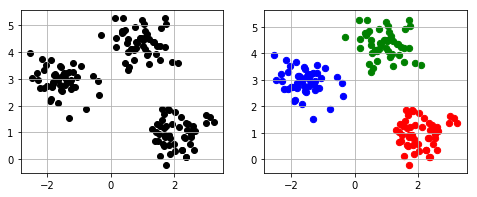

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# データセットの作成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)        

# k-means法を行います。
km = KMeans(n_clusters=3, random_state=0)
Y_km = km.fit_predict(X) # Y_kmに各データ点が属するクラスタのラベルが入ります

# グラフの描画
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
# 元データをプロット
ax1.scatter(X[:, 0],X[:, 1],c="black")
ax1.grid()
# クラスタリング結果をプロット
ax2.scatter(X[Y_km==0, 0],X[Y_km==0, 1],c="r",s=40,label="cluster 1")
ax2.scatter(X[Y_km==1, 0],X[Y_km==1, 1],c="b",s=40,label="cluster 2")
ax2.scatter(X[Y_km==2, 0],X[Y_km==2, 1],c="g",s=40,label="cluster 3")
ax2.grid()
plt.show()

In [6]:
print(X)
print(Y_km)

[[ 2.60509732  1.22529553]
 [ 0.5323772   3.31338909]
 [ 0.802314    4.38196181]
 [ 0.5285368   4.49723858]
 [ 2.61858548  0.35769791]
 [ 1.59141542  4.90497725]
 [ 1.74265969  5.03846671]
 [ 2.37533328  0.08918564]
 [-2.12133364  2.66447408]
 [ 1.72039618  5.25173192]
 [ 3.1368855   1.56592763]
 [-0.37494566  2.38787435]
 [-1.84562253  2.71924635]
 [ 0.72144399  4.08475018]
 [ 0.16117091  4.53517846]
 [-1.99912714  2.71285741]
 [-1.47804153  3.2093591 ]
 [ 1.8706766   0.77797407]
 [-1.5933443   2.76898682]
 [ 2.03562611  0.31361691]
 [ 0.64003985  4.12401075]
 [ 2.4411628   1.30941574]
 [ 1.13280393  3.87673946]
 [ 1.04829186  5.03092408]
 [-1.26637157  2.62998828]
 [ 2.31690585  0.81189049]
 [ 2.36230721  1.358767  ]
 [ 1.2091013   3.53566548]
 [-2.54224625  3.95012869]
 [ 1.4815332   0.67875364]
 [-1.59487886  3.48632794]
 [-1.82556205  2.7989214 ]
 [-1.13374003  2.68467271]
 [-1.758702    3.158623  ]
 [ 0.3498724   4.69253251]
 [ 1.68548602  1.66917096]
 [ 2.989047    1.35068599]
 

In [26]:
print(X[Y_km==0,0])

[2.60509732 2.61858548 2.37533328 3.1368855  1.8706766  2.03562611
 2.4411628  2.31690585 2.36230721 1.4815332  1.68548602 2.989047
 1.73734448 1.87827057 2.13860427 2.48368283 1.83769075 1.84845803
 2.3914149  3.01673853 1.62465468 1.44254976 2.52889351 1.5381461
 1.71810119 1.65356269 2.20438661 3.24683991 2.51569693 2.36788325
 2.24348029 1.30963873 1.70798359 1.39731382 2.02114672 1.67030948
 2.52997792 2.00604126 1.50307585 1.82750127 2.64928242 1.8062513
 1.92126584 1.68289011 1.40883907 1.59885641 1.73345832 2.34356293
 2.25327088 1.55515985]


#### ヒント

- コードを実行することにより、データの塊ごと色づけされていることがわかります。これは、データの塊ごとにクラスタリングされていることを示しています。

#### 解答例

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# データセットの作成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)        

# k-means法を行います。
km = KMeans(n_clusters=3, random_state=0)
Y_km = km.fit_predict(X) # Y_kmに各データ点が属するクラスタのラベルが入ります

# グラフの描画
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
# 元データをプロット
ax1.scatter(X[:, 0],X[:, 1],c="black")
ax1.grid()
# クラスタリング結果をプロット
ax2.scatter(X[Y_km==0, 0],X[Y_km==0, 1],c="r",s=40,label="cluster 1")
ax2.scatter(X[Y_km==1, 0],X[Y_km==1, 1],c="b",s=40,label="cluster 2")
ax2.scatter(X[Y_km==2, 0],X[Y_km==2, 1],c="g",s=40,label="cluster 3")
ax2.grid()
plt.show()

***

### 2.2.3 sklearnのKMeansライブラリ

前セクションのコードで使用した通り、`sklearn.cluster`の `KMeans` クラスは、データからクラスターを探し出し、各データにクラスタ番号を割り振ります。

```python
# sklearn.clusterのKMeansクラスをインポート
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,       # クラスターの個数
        nit="random",　         # セントロイドの初期値をランダムに設定  default: "k-means++"
          n_init=10,            # 異なるセントロイドの初期値を用いたk-meansの実行回数
         max_iter=300,          # k-meansアルゴリズムを繰り返す最大回数
         tol=1e-04,             # 収束と判定するための相対的な許容誤差
         random_state=0)        # 乱数発生初期化
    
Y_km = km.fit_predict(X) # クラスターが存在するデータを渡し、各サンプルに対するクラスタ番号を求める
```
　上記のコードにより **データからクラスターを指定した分探し出し、Y_kmに各サンプルに自動的にクラスタ番号が格納されます。** `KMeans` クラスには他にも様々な関数があります。

```python
# クラスタリングの計算を実行
km.fit(X[, y])
# クラスタリングの計算を行い、Xを分析に用いた距離空間に変換して返す
km.fit_transform(X[, y])
# 計算に用いたパラメータを返す
km.get_params([deep])
# Xのサンプルが属しているクラスタ番号を返す
km.predict(X)
# パラメータを設定する
km.set_params(**params)
# Xを分析に用いた距離空間に変換して返す
km.transform(X[, y])
```

#### 問題

- 以下のコードを実行して、`KMeans` クラスが **どのようにデータのクラスタリングを行うか** をみてみましょう。
- 適宜、`KMeans` クラスのクラスター数のパラメータを変更させ、クラスタリングが適切な場合と不適切な場合を確認しましょう。

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# サンプルデータの生成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)        

# KMeansクラスからkmインスタンスを作成
km = KMeans(n_clusters=3,            # クラスターの個数 # 変更してみてください
            init="random",           # セントロイドの初期値をランダムに設定  default: "k-means++"
            n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数
            max_iter=300,            # k-meansアルゴリズムを繰り返す最大回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # 乱数発生初期化

# fit_predictメソッドによりクラスタリングを行う
Y_km = km.fit_predict(X)


# クラスター番号(Y_km)に応じてデータをプロット
for n in range(np.max(Y_km)+1):
    plt.scatter(X[Y_km==n,0], X[Y_km==n,1], s=50, c = cm.hsv(float(n) / 10), marker="*", label="cluster"+str(n+1))
    
# セントロイドをプロット、km.cluster_centers_には各クラスターのセントロイドの座標が入っています
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker="*", c="black", label="centroids")

plt.legend(bbox_to_anchor=(1.05, 0.7),loc="upper left")
plt.grid()
plt.show()

#### ヒント

- make_blobs関数にて設定したクラスター数と、KMeansクラスのパラメータとして設定したクラスター数を一致させると、クラスタリングが適切に行われます。異なっていると、正しいクラスタリングができないケースが多いです。

#### 解答例

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# サンプルデータの生成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)        

# KMeansクラスからkmインスタンスを作成
km = KMeans(n_clusters=3,            # クラスターの個数 # 変更してみてください
            init="random",           # セントロイドの初期値をランダムに設定  default: "k-means++"
            n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数
            max_iter=300,            # k-meansアルゴリズムを繰り返す最大回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # 乱数発生初期化

# fit_predictメソッドによりクラスタリングを行う
Y_km = km.fit_predict(X)


# クラスター番号(Y_km)に応じてデータをプロット
for n in range(np.max(Y_km)+1):
    plt.scatter(X[Y_km==n,0], X[Y_km==n,1], s=50, c = cm.hsv(float(n) / 10), marker="*", label="cluster"+str(n+1))
    
# セントロイドをプロット、km.cluster_centers_には各クラスターのセントロイドの座標が入っています
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker="*", c="black", label="centroids")

plt.legend(bbox_to_anchor=(1.05, 0.7),loc="upper left")
plt.grid()
plt.show()

***

### 2.2.4 SSEについて

　クラスタリングの性能評価関数の一つに **「SSE」(クラスタ内誤差平方和)** があります**SSEを用いることにより様々なk-meansクラスタリングの性能を評価** することができます。 SSEの数式は省略しますが、**SSEの値はクラスタ内の値がどれだけ離れているのかを示します**。
 
　sklearnでは `KMeans` クラスの`inertia_` 属性を通じて **SSEの値を取得できます** 。各データが **自身の属するクラスター重心からどれほどずれているか(分散)の総和** が **SSE** であるため、**SSEの値が小さいほどクラスタリングがうまくいっているモデル** と言えます。
 
```python
# クラスタ内誤差平方和にアクセスする
print ("Distortion: %.2f"% km.inertia_)
```

#### 問題

- 以下のコードを実行することにより、**SSEの値を確認** してみましょう。また `KMeans` のクラスター数を変更すると **SSEの値がどのように変化するか** 確認してみましょう。

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# サンプルデータの生成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)     

# KMeansクラスからkmインスタンスを作成
km = KMeans(n_clusters=3,            # クラスターの個数 # 変更してみてください
            init="random",           # セントロイドの初期値をランダムに設定  default: "k-means++"
            n_init=1,               # 異なるセントロイドの初期値を用いたk-meansの実行回数
            max_iter=300,            # k-meansアルゴリズムを繰り返す最大回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # 乱数発生初期化

# fit_predictメソッドによりクラスタリングを行う
Y_km = km.fit_predict(X)

# SSE値を出力
print("Distortion: %.2f"% km.inertia_)

# プロット
for n in range(np.max(Y_km)+1):
    plt.scatter(X[Y_km==n,0], X[Y_km==n,1], s=50, c = cm.hsv(float(n) / 10), marker="*", label="cluster"+str(n+1))
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker="*", c="black", label="centroids")
plt.legend(bbox_to_anchor=(1.05, 0.7),loc="upper left")
plt.grid()
plt.show()

#### ヒント

- 基本的にSSEの値が小さい程、クラスタリングがうまくいっていると言えますが、SSEの定義の関係から基本的にクラスター数が増えるほど値が小さくなっていきます。真に良いクラスター数の判断は、次のエルボー法によって行います。

#### 解答例

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# サンプルデータの生成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)     

# KMeansクラスからkmインスタンスを作成
km = KMeans(n_clusters=3,            # クラスターの個数 # 変更してみてください
            init="random",           # セントロイドの初期値をランダムに設定  default: "k-means++"
            n_init=1,               # 異なるセントロイドの初期値を用いたk-meansの実行回数
            max_iter=300,            # k-meansアルゴリズムを繰り返す最大回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # 乱数発生初期化

# fit_predictメソッドによりクラスタリングを行う
Y_km = km.fit_predict(X)

# SSE値を出力
print("Distortion: %.2f"% km.inertia_)

# プロット
for n in range(np.max(Y_km)+1):
    plt.scatter(X[Y_km==n,0], X[Y_km==n,1], s=50, c = cm.hsv(float(n) / 10), marker="*", label="cluster"+str(n+1))
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker="*", c="black", label="centroids")
plt.legend(bbox_to_anchor=(1.05, 0.7),loc="upper left")
plt.grid()
plt.show()

***

### 2.2.5 エルボー法

**k-meansクラスタリングで指定するクラスター数はどう決めれば良いか** といった問題があります。

このクラスター数を決定する時に参考になる手法があります。これは、 **<font color=#AA0000>エルボー法</font>** と呼ばれ、 **クラスタ数を大きくしていった時にSSEがどのように変化するか** プロットし、その結果から **k-meansのクラスタ数を決定する** 手法です。問題にあるコードを実行すればわかりますが、 **SSEの値がガクンと曲がる点があります。この時のクラスター数が最適なものとみなすことができます。** プロットの形状が肘が曲がっているように見えることから、エルボー法と呼ばれています。ただ、現実的には問題の結果図のような綺麗にある点でグラフが落ち込むようなエルボー図が得られることはなかなかありません。

#### 問題

- 次のコードを実行することにより、**エルボー図の概略** を掴みましょう。また `KMeans`  クラスのクラスター数の幅を広げ、**エルボー法に変化があるか** 確認してみましょう。


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# サンプルデータの生成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)     

distortions = []
for i  in range(1,11):                # クラスター数1~10を一気に計算 
    km = KMeans(n_clusters=i,
                init="k-means++",     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)                         # クラスタリングのを実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる
    
# グラフのプロット
plt.plot(range(1,11),distortions,marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

#### ヒント

- エルボー図においては、SSEの値が一度サチる(飽和する)と改善することはほとんどありません。

#### 解答例

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# サンプルデータの生成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)     

distortions = []
for i  in range(1,11):                # クラスター数1~10を一気に計算 
    km = KMeans(n_clusters=i,
                init="k-means++",     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)                         # クラスタリングのを実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる
    
# グラフのプロット
plt.plot(range(1,11),distortions,marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

***

## 2.3 DBSCAN

### 2.3.1 DBSCANのアルゴリズム

今まで見てきた **k-means法** は、**クラスター中心に出来るだけデータが集まる** ようにクラスタリングしていました。そのため、必然的に **クラスターは円形(球状)に近い形** を取ります。 **クラスターの大きさ・形に偏りがないときは効果を発揮します** が、 **クラスターの大きさ・形に偏りがあるデータの場合は良いクラスタリングができない** 傾向にあります。<br>
 
 　**k-means法** に対して、別の非階層クラスタリングのアルゴリズムに **<font color=#AA0000>「DBSCAN」</font>** があります。**<font color=#AA0000>「DBSCAN」</font>** のアルゴリズムは、 **クラスターを高密度(データが凝集している)の場所を低密度の場所から分離して** 捉えます。**クラスターサイズ・形に偏りがある際に真価を発揮します。**
  
　**<font color=#AA0000>「DBSCAN」</font>** では、**2つ**のパラメータを定義します。 `min_samples`と`eps`です。 **<font color=#AA0000>「DBSCAN」</font>** のアルゴリズムでは、次の **3種類** にデータ点を分類します

 1.あるデータの半径 `eps` 内に `min_sample` 数だけのデータがある場合、そのデータ点は **コア点** とみなします。<br>

 2.また、**コア点** ではないが、**コア点から半径 `eps` 内に入っているデータ**は、**ボーダー点**とみなします。 <br>

 3.どちらにも満たさないデータ点は、**ノイズ点** と見まします。

**コア点の集まり** から**クラスターを形成** します。**ボーダー点** は、**最も近いコア点の属するクラスターに割り振られます。** このように **<font color=#AA0000>「DBSCAN」</font>** のアルゴリズムでは、全データを3つのデータに分類することにより、 **偏ったデータや、平均的ではないクラスターも分類できるようになり、ノイズを正しく除去することもできます**。
 
　**<font color=#AA0000>「DBSCAN」</font>**  は、`sklearn.cluster`の`DBSCAN`クラスを利用することができます。主なパラメータとして、`eps`、`min_sample`、 `metric`により距離計算法を指定します。
```python
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric="euclidean")
Y_db = db.fit_predict(X)
```
問題で、**k-means法とDBSCANの分類結果を比べて見ましょう。**

#### 問題

- 次のコードを完成することにより、**k-means法とDBSCANの分類結果の相違を確認**してみましょう。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# 月型のデータを生成
X, Y = make_moons(n_samples=200, noise=0.05, random_state=0)

# グラフと2つの軸を定義 左はk-means法用、右はDBSCAN用
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

#k-means法
km = KMeans(n_clusters=2, random_state=0)
Y_km = km.fit_predict(X)

ax1.scatter(X[Y_km==0, 0], X[Y_km==0, 1], c="lightblue", marker="o", s=40, label="cluster 1")
ax1.scatter(X[Y_km==1, 0], X[Y_km==1, 1], c="red", marker="s", s=40, label="cluster 2")
ax1.set_title("K-means clustering")

# DBSCANでクラスタリング # コードを完成してください
db = 
Y_db = 

ax2.scatter(X[Y_db==0, 0], X[Y_db==0, 1], c="lightblue", marker="o", s=40, label="cluster 1")
ax2.scatter(X[Y_db==1, 0], X[Y_db==1, 1], c="red", marker="s", s=40, label="cluster 2")
ax2.set_title("DBSCAN clustering")
plt.legend()
plt.show()

#### ヒント

- k-means法は、今回のような複雑な形状をもったデータに弱い反面、DBSCANは、任意の形状をクラスタリングすることができます。

#### 解答例

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# 月型のデータを生成
X, Y = make_moons(n_samples=200, noise=0.05, random_state=0)

# グラフと2つの軸を定義 左はk-means法用、右はDBSCAN用
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

#k-means法
km = KMeans(n_clusters=2, random_state=0)
Y_km = km.fit_predict(X)

ax1.scatter(X[Y_km==0, 0], X[Y_km==0, 1], c="lightblue", marker="o", s=40, label="cluster 1")
ax1.scatter(X[Y_km==1, 0], X[Y_km==1, 1], c="red", marker="s", s=40, label="cluster 2")
ax1.set_title("K-means clustering")

# DBSCANでクラスタリング
db = DBSCAN(eps=0.2, min_samples=5, metric="euclidean")
Y_db = db.fit_predict(X)

ax2.scatter(X[Y_db==0, 0], X[Y_db==0, 1], c="lightblue", marker="o", s=40, label="cluster 1")
ax2.scatter(X[Y_db==1, 0], X[Y_db==1, 1], c="red", marker="s", s=40, label="cluster 2")
ax2.set_title("DBSCAN clustering")
plt.legend()
plt.show()

## 2.4 添削問題

 円状のデータのクラスタリングにおいて、k-means法とDBSCANによる結果の違いを見て見ましょう。

#### 問題

- sklearn.datasetsモジュールの「make_circles」関数を利用し、円状のデータを生成させた後、それらをk-means法とDBSCANを用いてクラスタリング、可視化しましょう。なお、結果図は、左にk-means法によるクラスタリング結果、右にDBSCANによるクラスタリング結果が表示されるようにしてください。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
 
# 円状のデータを生成

# figureオブジェクトの生成、並びに2軸の定義
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# k-meansのインスタンス化


# DBSCANのインスタンス化


# 左にk-means法によるクラスタリングの結果を表示


# 右にDBSCANによるクラスタリングの結果を表示

# 可視化
plt.show()

#### ヒント

- 円状のデータは、X, y = make_circles(n_samples=150, random_state=4, noise=0.05, factor=0.5)と書くことで、計算することができます。
- DBSCANは、パラメータeps, min_samplesの値によってクラスタリングの結果が著しく変わるため、調整が必要です。

#### 解答例

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
 
# 円状のデータを生成
X, y = make_circles(n_samples=150, random_state=4, noise=0.05, factor=0.5)
# figureオブジェクトの生成、並びに2軸の定義
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# k-meansのインスタンス化
km = KMeans(n_clusters=2, random_state=0)
Y_km = km.fit_predict(X)

# DBSCANのインスタンス化
db = DBSCAN(eps=0.3, min_samples=7, metric="euclidean")
Y_db = db.fit_predict(X)

# 左にk-means法によるクラスタリングの結果を表示
ax1.scatter(X[Y_km==0, 0], X[Y_km==0, 1])
ax1.scatter(X[Y_km==1, 0], X[Y_km==1, 1])
ax1.set_title("k-means")

# 右にDBSCANによるクラスタリングの結果を表示
ax2.scatter(X[Y_db==0, 0], X[Y_db==0, 1])
ax2.scatter(X[Y_db==1, 0], X[Y_db==1, 1])
ax2.set_title("DBSCAN")

# 可視化
plt.show()

#### 解説

　k-means法は、全てのクラスターを同じサイズに統一しようとする性質があり結果図のように、円状のデータが半分に分かれていることがわかります。つまりこのようなデータには、不向きです。反対に、DBSCANは不均一なデータにも対処できるため、結果図のように円状のデータも綺麗に分割できることがわかります。

***